# Happiness Score Analysis

# Load and view data

In [188]:
# Load relevant libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Load data
ds=pd.read_csv('happiness_score_dataset.csv')


In [191]:
ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [192]:
ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [193]:
ds.shape

(158, 12)

In [194]:
ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [195]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Check for and remove null values

In [196]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Check correlation

In [197]:
# Check correlation
dscor=ds.corr()
dscor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


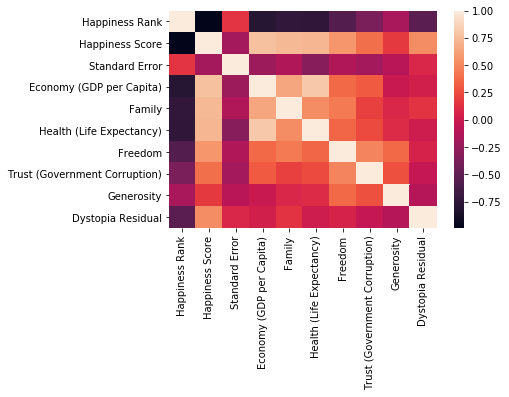

In [198]:
# Show correlation heatmap
sns.heatmap(dscor)

# Data visualization

In [199]:
ds.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [200]:
grouped_ds = ds.groupby('Region')

maximums = grouped_ds.max()
maximums

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,New Zealand,10,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646
Central and Eastern Europe,Uzbekistan,134,6.505,0.06913,1.18498,1.34043,0.87337,0.65821,0.38331,0.30030,3.10712
Eastern Asia,Taiwan,100,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323
Latin America and Caribbean,Venezuela,119,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214
Middle East and Northern Africa,Yemen,156,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854
North America,United States,15,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011
Southeastern Asia,Vietnam,145,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945
Southern Asia,Sri Lanka,153,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709
Sub-Saharan Africa,Zimbabwe,158,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137


In [201]:
ds.groupby(['Region'], sort=False)['Happiness Score'].mean()

Region
Western Europe                     6.689619
North America                      7.273000
Australia and New Zealand          7.285000
Middle East and Northern Africa    5.406900
Latin America and Caribbean        6.144682
Southeastern Asia                  5.317444
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Sub-Saharan Africa                 4.202800
Southern Asia                      4.580857
Name: Happiness Score, dtype: float64

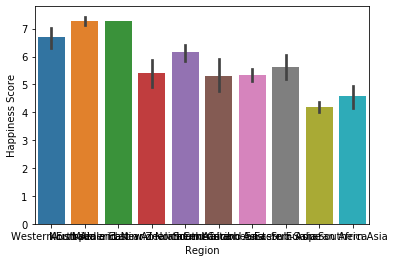

In [202]:
sns.barplot(x='Region',y='Happiness Score',data=ds)

I don't know how to change the orientation of the x-axis labels - please advise.

# A few more graphs by region

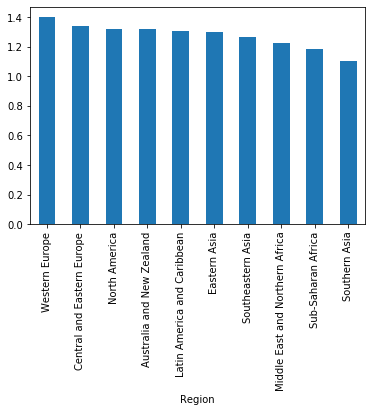

In [203]:
# Show Happiness provided by family by region
ds.groupby('Region')['Family'].max().sort_values(ascending=False).head(20).plot.bar()

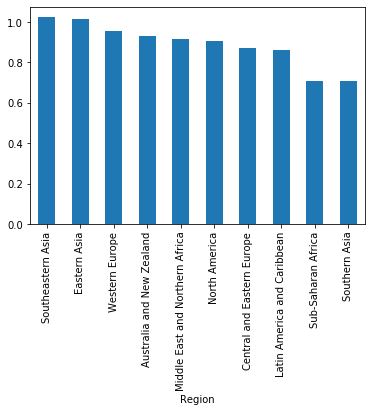

In [204]:
# Show Happiness provided by health and life expectancy by region
ds.groupby('Region')['Health (Life Expectancy)'].max().sort_values(ascending=False).head(20).plot.bar()

# Check region with max scores for features in dataset

In [205]:
ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [206]:
ds.set_index('Region', inplace=True)

In [207]:
# Show Region with the maximum happiness score
ds['Happiness Score'].idxmax()

'Western Europe'

In [208]:
# Show Region with the maximum Standard Error
ds['Standard Error'].idxmax()

'Latin America and Caribbean'

In [209]:
# Show Region with the maximum Economy (GDP per Capita)
ds['Economy (GDP per Capita)'].idxmax()

'Middle East and Northern Africa'

In [210]:
# Show Region with the maximum happiness with Family
ds['Family'].idxmax()

'Western Europe'

In [211]:
# Show Region with the maximum happiness with Health (Life Expectancy)
ds['Health (Life Expectancy)'].idxmax()

'Southeastern Asia'

In [212]:
# Show Region with the maximum Freedom
ds['Freedom'].idxmax()

'Western Europe'

In [213]:
# Show Region with the maximum Trust (Government Corruption)
ds['Trust (Government Corruption)'].idxmax()

'Sub-Saharan Africa'

In [214]:
# Show Region with the maximum Generosity
ds['Generosity'].idxmax()

'Southeastern Asia'

In [215]:
# Show Region with the maximum happiness score
ds['Dystopia Residual'].idxmax()

'Latin America and Caribbean'

# Check countries with max scores for features in dataset

In [216]:
ds.groupby(['Country'], sort=False)['Happiness Score'].max()

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
               ...  
Rwanda         3.465
Benin          3.340
Syria          3.006
Burundi        2.905
Togo           2.839
Name: Happiness Score, Length: 158, dtype: float64

# Check countries with max scores for features in dataset

In [217]:
# Set country as index so that the country that accompanies the max value is shown
ds.set_index('Country', inplace=True)

In [218]:
# Show country with the maximum happiness score
ds['Happiness Score'].idxmax()

'Switzerland'

In [219]:
# Show country with the maximum standard error
ds['Standard Error'].idxmax()

'Jamaica'

In [220]:
# Show country with the maximum GDP per capita
ds['Economy (GDP per Capita)'].idxmax()

'Qatar'

In [221]:
# Show country with the maximum happiness with family
ds['Family'].idxmax()

'Iceland'

In [222]:
# Show country with the maximum happiness with personal health
ds['Health (Life Expectancy)'].idxmax()

'Singapore'

In [223]:
# Show country with the maximum freedom
ds['Freedom'].idxmax()

'Norway'

In [224]:
# Show country with the maximum trust (Government Corruption)
ds['Trust (Government Corruption)'].idxmax()

'Rwanda'

In [225]:
# Show country with the maximum generosity
ds['Generosity'].idxmax()

'Myanmar'

In [226]:
# Show country with the maximum distopia result
ds['Dystopia Residual'].idxmax()

'Mexico'